# Import Libraries and Data

Questions for Reference

• Subscriber trends and they compare to non-subscribers?

• Most frequent trip days?

• Most frequent trip hours?

• Most popular stations to start trips?

• Ending trips most popular stations?

• Frequent age groups using the application?

• Do the popularities/ frequencies of these qualifying questions fluctuate?

-In which directions, and at which times?


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#folder shortcut
path = r'/Users/drich/Desktop/Citi Bike'

In [3]:
# Importing citibike csv
citi61 = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'OGCiti_Bike.csv'), index_col = False)

In [6]:
# Check the matplotlib version
matplotlib.__version__

'3.7.1'

In [7]:
citi61.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           4         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber        1968  female   
1             -73.987140            581  Subscriber        1983    male   
2             -73.988639            361  Subscriber        1989    male   
3             -73.967416            561  Subscriber        1988  female   
4             -73.983799            427  Subscriber        1986  female   

   start_of_ride    end_of_ride  
0   9/9/13 18:18   9/9/13 18:35  
1  9/12/13 18:38  9/12/13 18:48  
2  9/18/13 19:44  9/18/13 19:50  
3  9/28/13 11:54  9/28/13 12:03  
4  9/27/13 22:01  9/27/13 22:08

In [9]:
# Columns list
citi61.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride'],
      dtype='object')

In [11]:
citi61.shape

(42993, 17)

In [13]:
#remove unamed columns
citi61 = citi61.drop(columns = ['Unnamed: 0'])

In [15]:
citi61.head(10)

day_of_week  start_hour  start_station_id       start_station_name  \
0         Mon          18               523          W 38 St & 8 Ave   
1         Thu          18               257  Lispenard St & Broadway   
2         Wed          19               479          9 Ave & W 45 St   
3         Sat          11               527          E 33 St & 1 Ave   
4         Fri          22               293    Lafayette St & E 8 St   
5         Sun          13               380         W 4 St & 7 Ave S   
6         Sat          10               346      Bank St & Hudson St   
7         Fri          12               510          W 51 St & 6 Ave   
8         Tue          16               446          W 24 St & 7 Ave   
9         Fri          23               251      Mott St & Prince St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               40.754666               -73.991382             334   
1               40.719392               -74.002472             236   
2               40.760193               -73.991255             513   
3               40.743156               -73.974347             441   
4               40.730287               -73.990765             432   
5               40.734011               -74.002939             317   
6               40.736529               -74.006180             212   
7               40.760660               -73.980420             422   
8               40.744876               -73.995299             342   
9               40.723180               -73.994800             460   

             end_station_name  end_station_latitude  end_station_longitude  \
0             W 20 St & 7 Ave             40.742388             -73.997262   
1         St Marks Pl & 2 Ave             40.728419             -73.987140   
2            W 56 St & 10 Ave             40.768254             -73.988639   
3             E 52 St & 2 Ave             40.756014             -73.967416   
4           E 7 St & Avenue A             40.726218             -73.983799   
5           E 6 St & Avenue B             40.724537             -73.981854   
6     W 16 St & The High Line             40.743349             -74.006818   
7            W 59 St & 10 Ave             40.770513             -73.988038   
8  Columbia St & Rivington St             40.717400             -73.980166   
9          S 4 St & Wythe Ave             40.712859             -73.965903   

   trip_duration  subscriber  birth_year  gender  start_of_ride    end_of_ride  
0            993  Subscriber        1968  female   9/9/13 18:18   9/9/13 18:35  
1            581  Subscriber        1983    male  9/12/13 18:38  9/12/13 18:48  
2            361  Subscriber        1989    male  9/18/13 19:44  9/18/13 19:50  
3            561  Subscriber        1988  female  9/28/13 11:54  9/28/13 12:03  
4            427  Subscriber        1986  female  9/27/13 22:01  9/27/13 22:08  
5            639  Subscriber        1994    male  9/29/13 13:13  9/29/13 13:23  
6            263  Subscriber        1969    male  9/21/13 10:48  9/21/13 10:52  
7            666  Subscriber        1993    male  9/20/13 12:29  9/20/13 12:40  
8            582  Subscriber        1983    male   9/3/13 16:56   9/3/13 17:05  
9           1250  Subscriber        1985    male   9/6/13 23:02   9/6/13 23:23

In [16]:
citi61.corr()
# warning

/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_1604/3264429533.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  citi61.corr()


start_hour  start_station_id  start_station_latitude  \
start_hour                 1.000000         -0.003737               -0.003228   
start_station_id          -0.003737          1.000000                0.106780   
start_station_latitude    -0.003228          0.106780                1.000000   
start_station_longitude   -0.045644          0.086098                0.203817   
end_station_id             0.004752          0.043066                0.053565   
end_station_latitude      -0.037997          0.057260                0.579007   
end_station_longitude      0.010231          0.023396                0.067596   
trip_duration              0.048753          0.046764               -0.016408   
birth_year                 0.064049         -0.004759               -0.046369   

                         start_station_longitude  end_station_id  \
start_hour                             -0.045644        0.004752   
start_station_id                        0.086098        0.043066   
start_station_latitude                  0.203817        0.053565   
start_station_longitude                 1.000000        0.022999   
end_station_id                          0.022999        1.000000   
end_station_latitude                    0.082088        0.104482   
end_station_longitude                   0.403150        0.090608   
trip_duration                           0.001572        0.036858   
birth_year                              0.028715       -0.004261   

                         end_station_latitude  end_station_longitude  \
start_hour                          -0.037997               0.010231   
start_station_id                     0.057260               0.023396   
start_station_latitude               0.579007               0.067596   
start_station_longitude              0.082088               0.403150   
end_station_id                       0.104482               0.090608   
end_station_latitude                 1.000000               0.189827   
end_station_longitude                0.189827               1.000000   
trip_duration                       -0.046746              -0.000024   
birth_year                          -0.042970               0.039176   

                         trip_duration  birth_year  
start_hour                    0.048753    0.064049  
start_station_id              0.046764   -0.004759  
start_station_latitude       -0.016408   -0.046369  
start_station_longitude       0.001572    0.028715  
end_station_id                0.036858   -0.004261  
end_station_latitude         -0.046746   -0.042970  
end_station_longitude        -0.000024    0.039176  
trip_duration                 1.000000   -0.046076  
birth_year                   -0.046076    1.000000

In [17]:
citi61.columns

Index(['day_of_week', 'start_hour', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'start_of_ride',
       'end_of_ride'],
      dtype='object')

In [38]:
df_sub = citi61[['start_hour', 'trip_duration', 'start_station_id', 'end_station_id', 'birth_year']]

In [39]:
#current dir
cwd = os.getcwd()
cwd

'/Users/drich/Desktop/Citi Bike/03 Scripts'

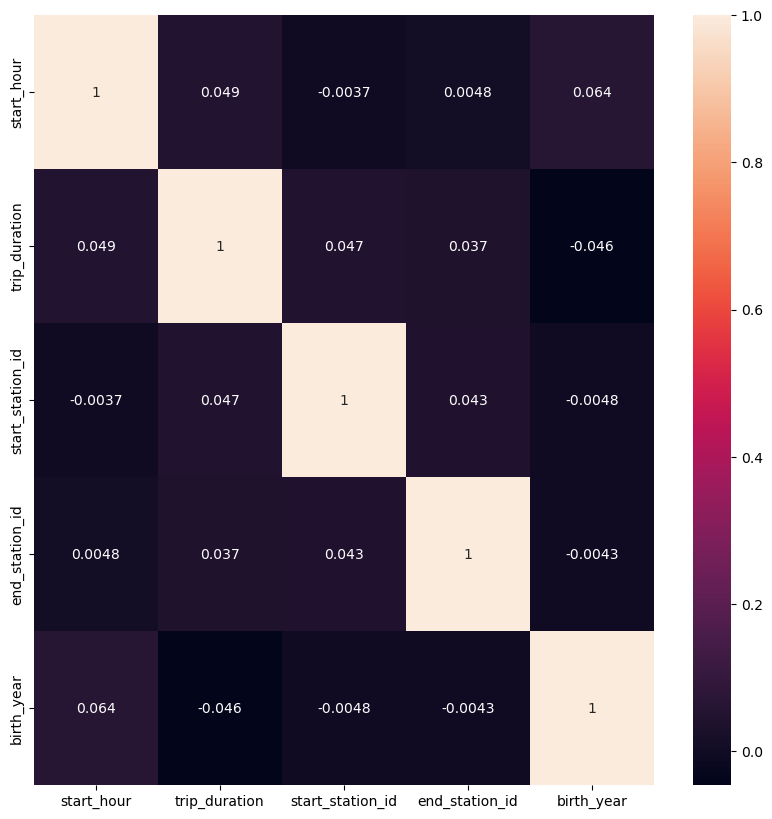

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_1 = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

The correlation between these variables is not super strong as this is not the best assessment of this data. Though this visual is possible it does not tell us as much about this data as we would actually like to know due to the type of numerical and non-numeric data we havae at hand blending in a non-cohesive way on this map.

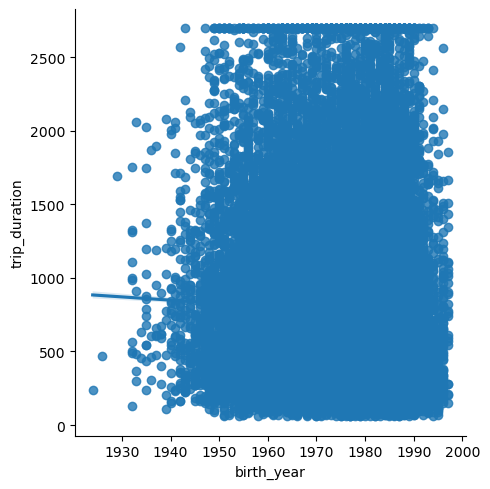

In [43]:
# Create a scatterplot for the 'birth_year' and 'trip_duration' columns in seaborn
sns.lmplot(x = 'birth_year', y = 'trip_duration', data = citi61)

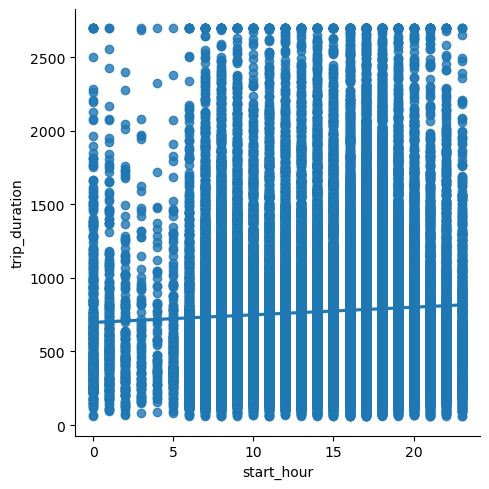

In [45]:
# Create a scatterplot for the 'start_hour' and 'trip_duration' columns in seaborn
sns.lmplot(x = 'start_hour', y = 'trip_duration', data = citi61)

There is an easier relationship to understand with these scatterplot visuals because in the first visual we are able to determine that there is still a higher concentration of riders with a higher trip duration with a more recent birth year. In the second scatterplot, we are able to determine that some hours (0-6) have shorter trip durations and a lesser concentration while hours 6-22 have a major peak of information. The problem I will note is that there is so much data that it is still a bit challenging to digest.

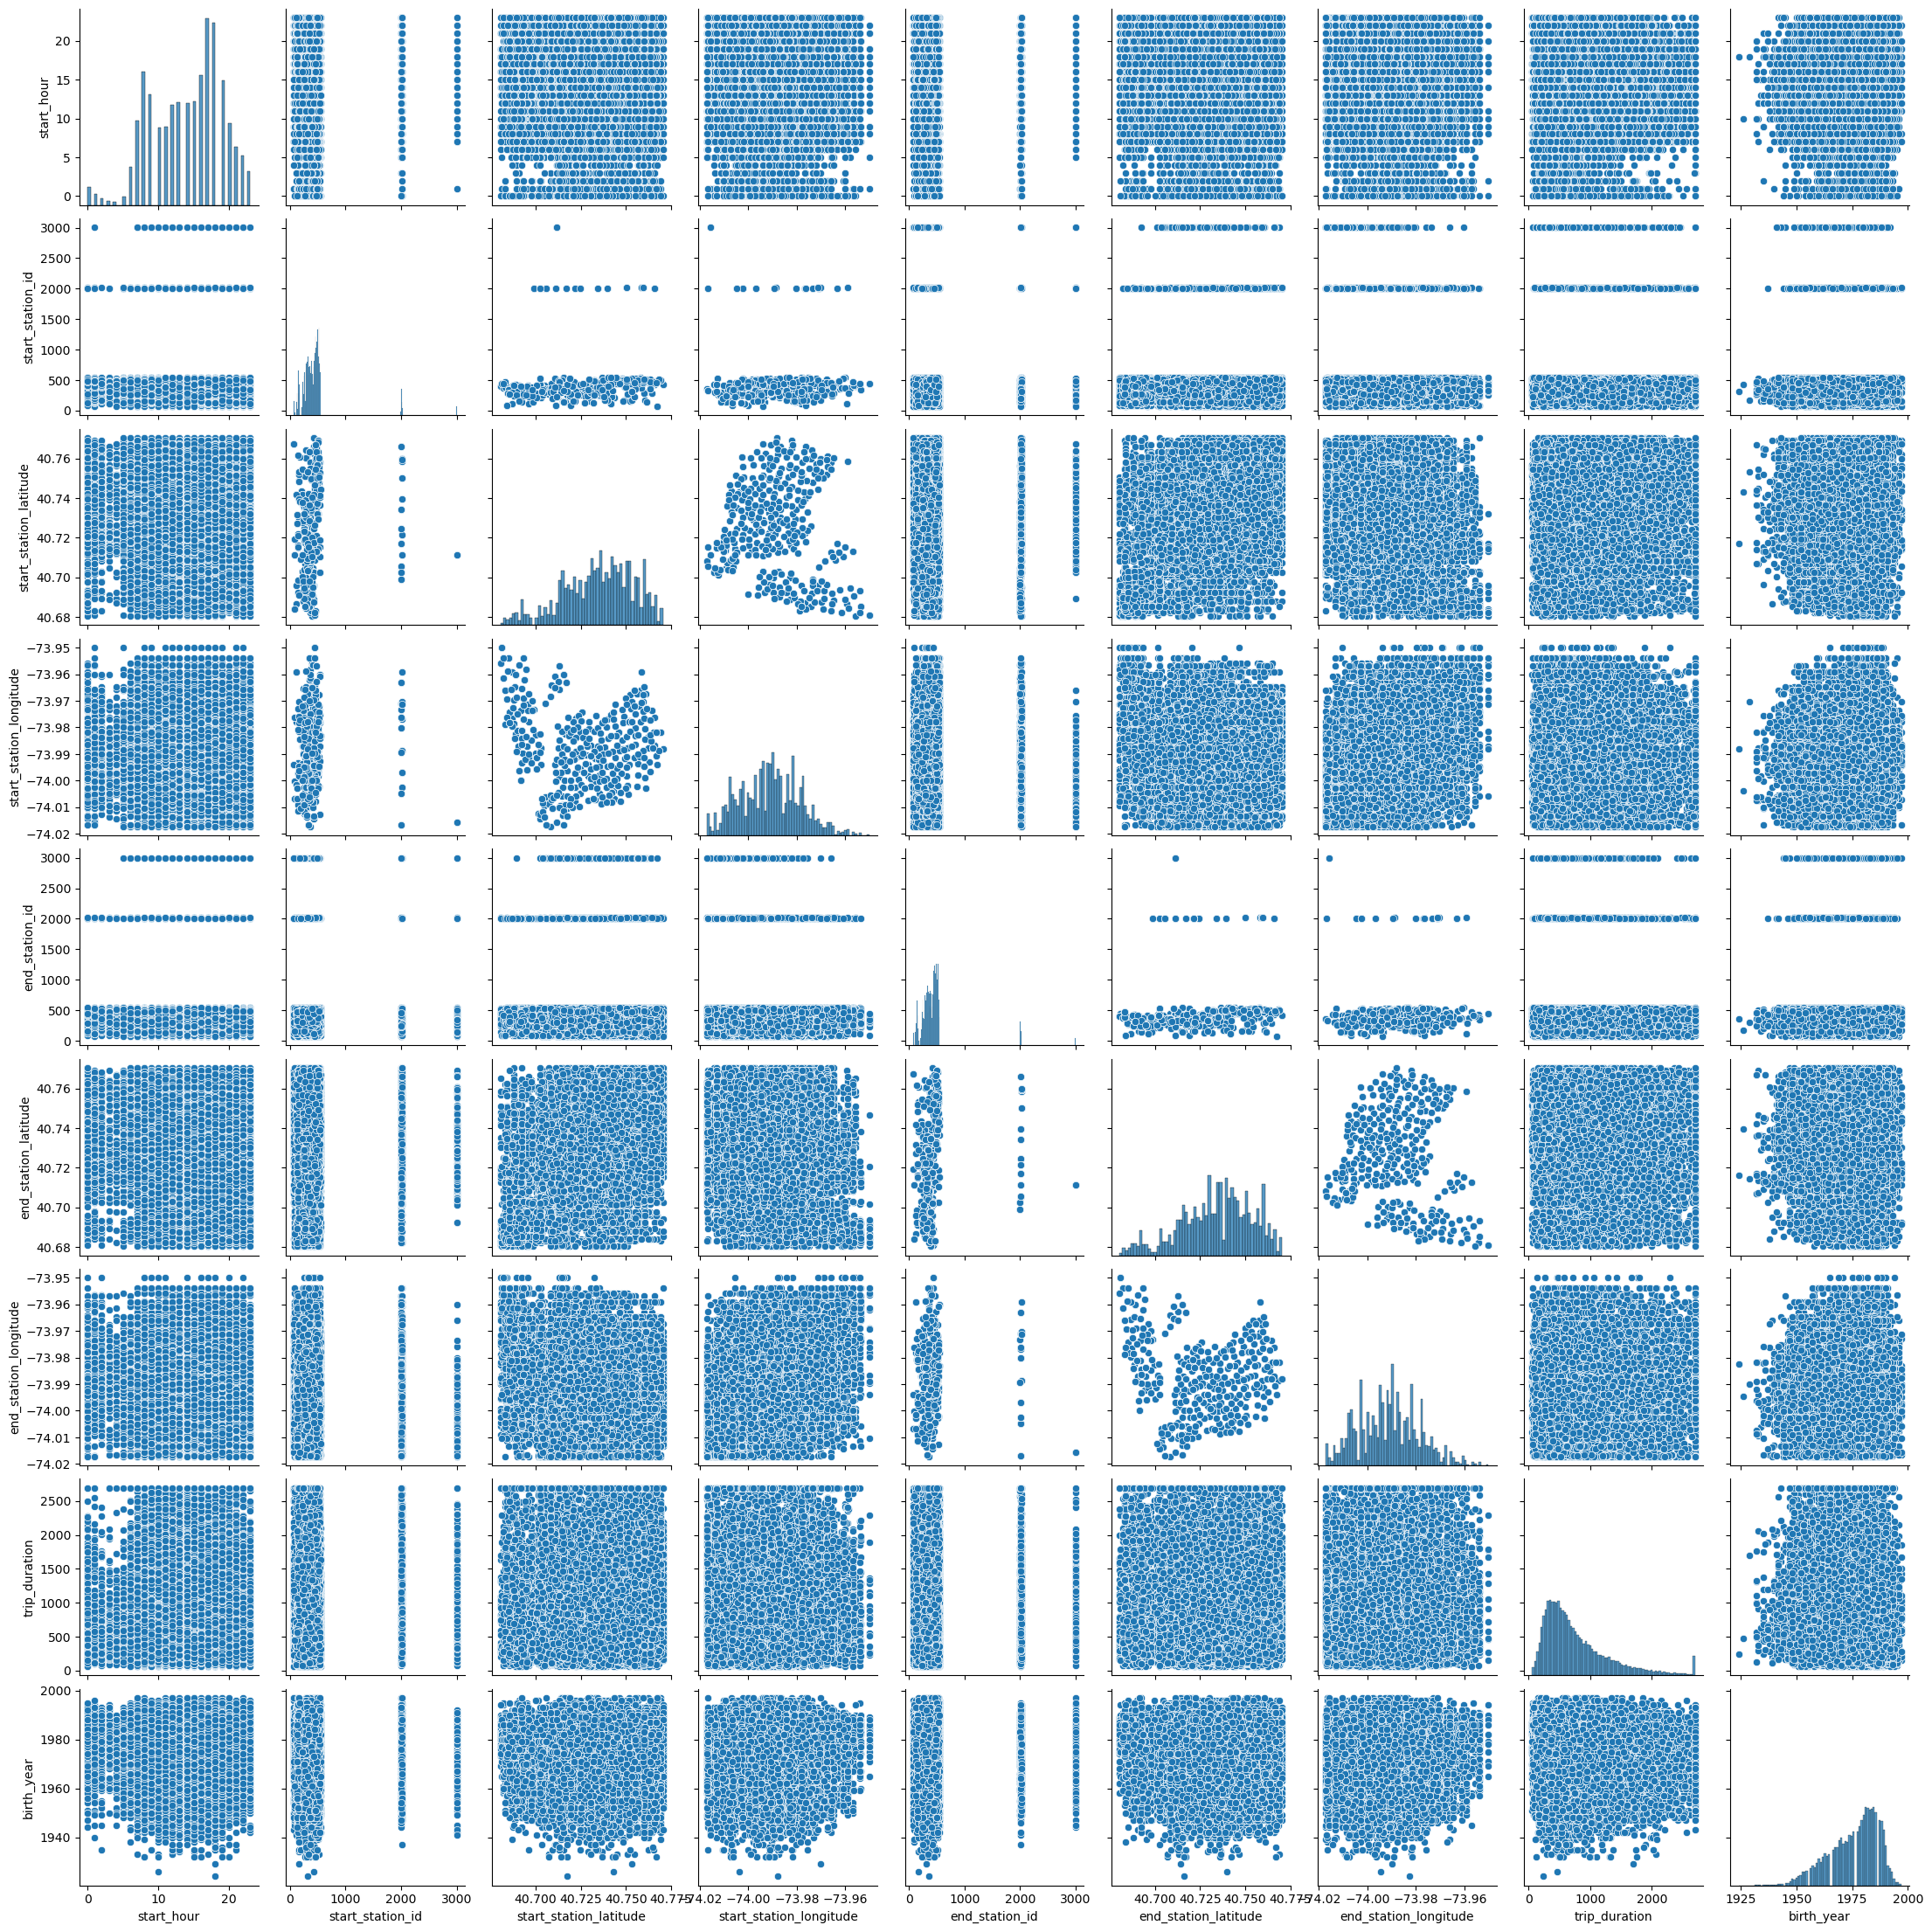

In [47]:
g = sns.pairplot(citi61)

As far as the distribution of variables, some of the data is a. bit all over the place here. That being said, the relationships I am drawn to investigating more are betweek trip durations, ages (based on birth year), times of day and I want to develop a better understanding of subscribers as they relate to overall popularity and trips.

<Axes: xlabel='trip_duration', ylabel='Count'>

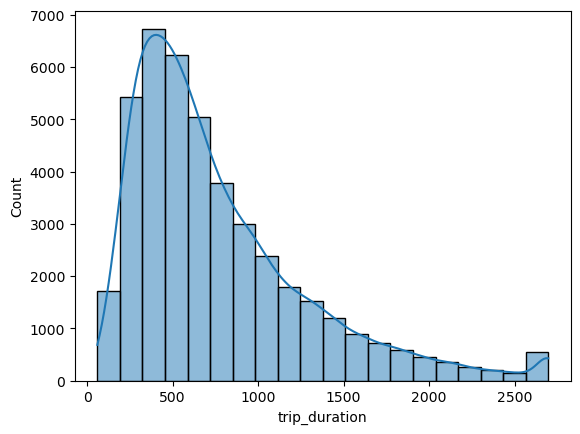

In [48]:
# create a histogram 
sns.histplot(citi61['trip_duration'], bins = 20, kde = True)

less than 400 - short trip
400-1000 - normal trip
1000 and above - long trip

In [51]:
citi61.loc[citi61['trip_duration'] < 400, 'duration group'] = 'small_trip'

In [ ]:
citi61.loc[(citi61['trip_duration'] >= 400) & (citi61['trip_duration'] < 1000), 'duration group'] = 'normal_trip'

In [62]:
citi61.loc[citi61['trip_duration'] >= 1000, 'duration group'] = 'long_trip'

TypeError: '>=' not supported between instances of 'str' and 'int'

In [63]:
# check the column
\
citi61['duration group'].value_counts(dropna = False)

normal_trip    21245
small_trip     11012
NaN            10736
Name: duration group, dtype: int64

In [64]:
#Change gender type to string
citi61['trip_duration'] = citi61['trip_duration'].astype('int')

ValueError: invalid literal for int() with base 10: 'long_trip'

# The error message means that the string provided to int could not be parsed as an integer. The part at the end, after the :, shows the string that was provided. Please provide any advice on how to get my long_trip group to work! This is additional and not required for Task 6.2, so just let me know whenever you have a second! :)

To interpret the result though, i will use the NaN values in this grouping to look at the long category. Our categories are as follows:

normal_trip    21245

small_trip     11012

NaN            10736 (long_trip)

This means that the normal_trip category is definitely consisting of the highest concentration of trips, then small trips, with long trips in last.

New questions that I have for this dataset are regarding looking further into ages of our clients in order to address what our most popular age groups are. One component of our questions that I created which we can answer further a this present moment is that there are relationships between start time of trips and ride duration times, etc.

Hypotheses:

The younger the client, the longer the trip duration

Normal trip length will be the most popular

Daytime and work travel hours will be the most prevalent in use in the study